## Grid - Filtros y detección de bordes

Visión por Computadora 1 - TP2

Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

In [1]:
import numpy as np
import cv2 as cv
#from skimage.util import random_noise
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = ['metalgrid.jpg', 'tela2.jpg']
img = cv.imread(files[0])
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

1. Operador de **Sobel** para encontrar el gradiente de intensidad de la imagen
* *Magnitud* o módulo: G = (G_x**2 + G_y**2) ** 1/2 
    - vector de derivadas parciales respecto de las 2 direcciones (ejes 2D).
    - -> Pitágoras para aproximar la magnitud del gradiente (hipotenusa)... cómo varía la intensidad cuando se detecta la dirección hacia dónde se da el mayor incremento de intensidad de la imagen. 
* *Dirección*: Theta = arctan(G_y/G_x) 
    - tangente inverse 
    - devuelve el ángulo del argumento (+/- inf) en el rango [-pi/2, pi/2], misma dim que la del argumento.

In [3]:
# vamos con el paso a paso de Canny
# 11° foco en cálculo de gradientes e indicadores derivados

# filtro separable
# suavisado gaussiano
suav_gauss = cv.GaussianBlur(img,(5,5),0) # 5x5 por gral. en Canny

# Sobelx en 'float32' -> CV_32F 
# the pixel can have any value between 0-1.0 (great 4 calculations)
# cv.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
sobelx_64 = cv.Sobel(suav_gauss,cv.CV_32F,1,0,ksize=3)

# it has to be converted into 8bits to save or display by multiplying each pixel by 255
# re-scaling 4 [avoiding overflow
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64 / absx_64.max() * 255
sobelx_8u = np.uint8(sobelx_8u1)

# Sobely (ídem Sobelx)
sobely_64 = cv.Sobel(suav_gauss,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# magnitud 
mag = np.hypot(sobelx_8u, sobely_8u) # teo Pitágoras
mag = mag / mag.max() * 255 # re-scaling into 8bits (not compulsory)
mag = np.uint8(mag) 

# dirección 
theta = np.arctan2(sobely_64, sobelx_64) # en radianes
angle = np.rad2deg(theta) # ángulo -> conversión a grados 

# asocio las imágenes con los filtros
#img1 = cv.hconcat([img, suav_gauss]) # img + suavizado gaussiano
#img2 = cv.hconcat([img, sobelx_8u, sobely_8u]) # img + suavizado + gaussiano

# me queda probar con Schaar

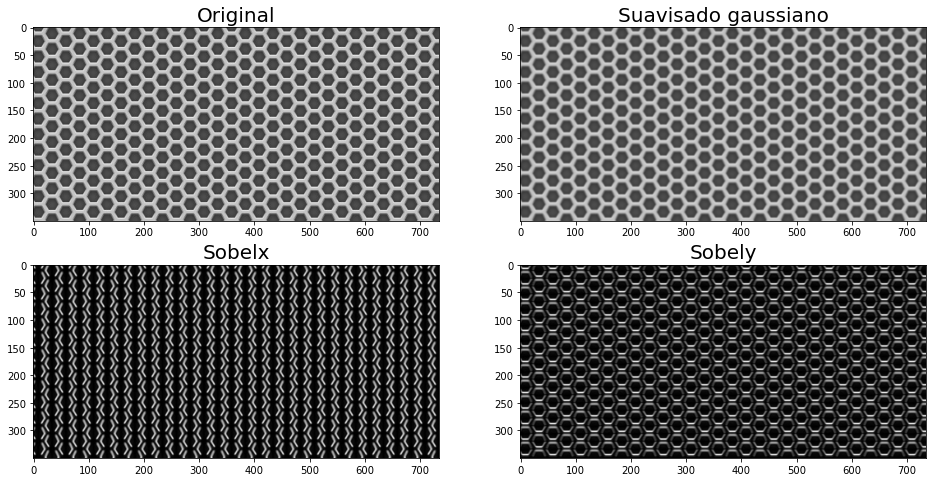

In [4]:
# visualizo
fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.imshow(img, vmin=0, vmax=255)
ax2.imshow(suav_gauss, vmin=0, vmax=255)
ax3.imshow(sobelx_8u, vmin=0, vmax=255)
ax4.imshow(sobely_8u, vmin=0, vmax=255)

ax1.set_title('Original', fontsize=20)
ax2.set_title('Suavisado gaussiano', fontsize=20)
ax3.set_title('Sobelx', fontsize=20)
ax4.set_title('Sobely', fontsize=20)

plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


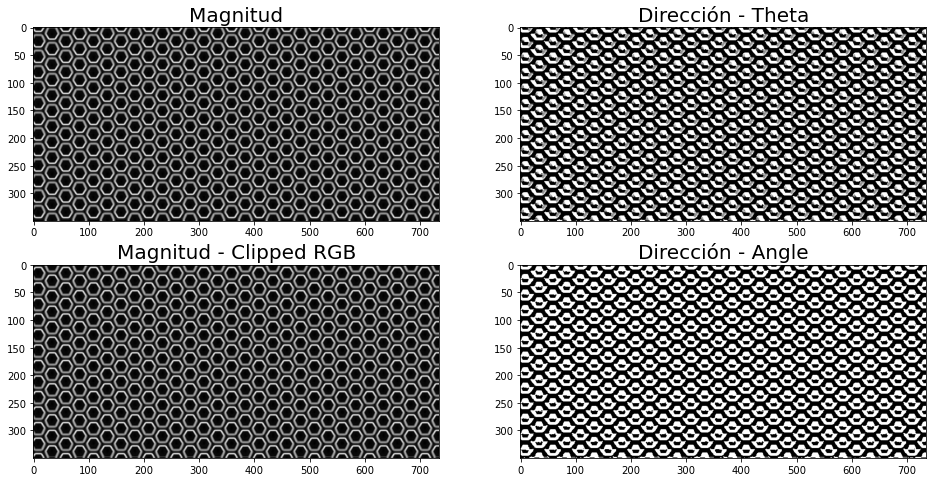

In [5]:
# visualizo
fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.imshow(mag, vmin=0, vmax=255)
ax2.imshow(theta, vmin=0, vmax=255)
ax3.imshow(np.clip(mag, 0, 255)[::-1,:,::-1], vmin=0, vmax=255)
ax4.imshow(angle, vmin=0, vmax=255)

ax1.set_title('Magnitud', fontsize=20)
ax2.set_title('Dirección - Theta', fontsize=20)
ax3.set_title('Magnitud - Clipped RGB', fontsize=20)
ax4.set_title('Dirección - Angle', fontsize=20)

plt.show();

In [6]:
# Canny build-in
# (incluye lo visualizado antes + supresión de no-máximos + id de umbrales de histéresis)
# cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges

#img_bordes = cv.Canny(img, 30, 100, L2gradient=True)
img_bordes = cv.Canny(img, 50, 200, L2gradient=True)
#cv.imshow("Bordes con Canny", img_bordes)

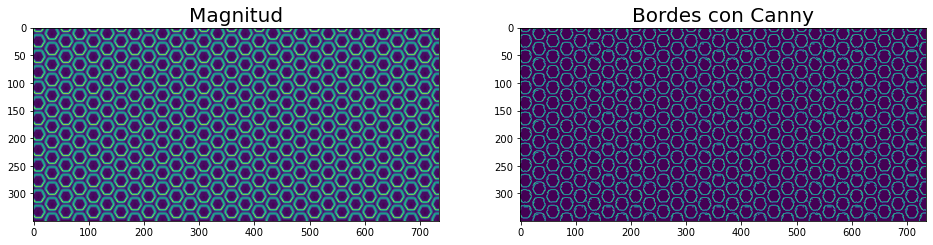

In [7]:
# visualizo
fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.imshow(mag[:,:,-1], vmin=0, vmax=255)
#ax1.imshow(np.clip(mag, 0, 255)[::-1,:,::-1], vmin=0, vmax=255)
ax2.imshow(img_bordes, vmin=0, vmax=255)

ax1.set_title('Magnitud', fontsize=20)
#ax1.set_title('Magnitud - Clipped RGB', fontsize=20)
ax2.set_title('Bordes con Canny', fontsize=20)

plt.show();

In [8]:
# con la tela
img = cv.imread(files[1])

suav_gauss = cv.GaussianBlur(img,(5,5),0) # 5x5 por gral. en Canny

sobelx_64 = cv.Sobel(suav_gauss,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64 / absx_64.max() * 255
sobelx_8u = np.uint8(sobelx_8u1)

sobely_64 = cv.Sobel(suav_gauss,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# magnitud 
mag = np.hypot(sobelx_8u, sobely_8u) # teo Pitágoras
mag = mag / mag.max() * 255 # re-scaling into 8bits (not compulsory)
mag = np.uint8(mag) 

# dirección 
theta = np.arctan2(sobely_64, sobelx_64) # en radianes
angle = np.rad2deg(theta) # ángulo -> conversión a grados 

# Canny
img_bordes = cv.Canny(img, 30, 180, L2gradient=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


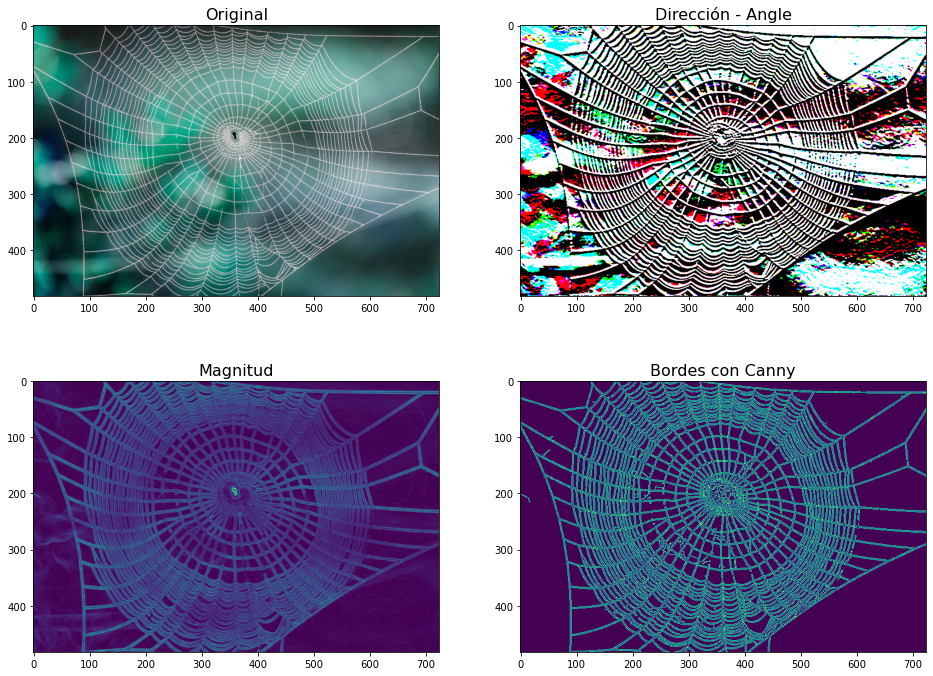

In [14]:
# visualizo
fig = plt.figure(figsize=(16,12))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.imshow(img, vmin=0, vmax=255)
ax2.imshow(angle, vmin=0, vmax=255)
ax3.imshow(mag[:,:,-1], vmin=0, vmax=255)
ax4.imshow(img_bordes, vmin=0, vmax=255)

ax1.set_title('Original', fontsize=16)
ax2.set_title('Dirección - Angle', fontsize=16)
ax3.set_title('Magnitud', fontsize=16)
ax4.set_title('Bordes con Canny', fontsize=16)

plt.show();

### Tips varios

https://docs.opencv.org/4.5.2/d5/d0f/tutorial_py_gradients.html

In our last example, output datatype is cv.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv.CV_16S, cv.CV_64F etc, take its absolute value and then convert back to cv.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

In [10]:
# analogía BGR to RGB
#z = np.array([[2,2],[2,2]], [[1,1], [1,1]], [[3,3],[3,3]]) # esto no aplica!
a = np.ones((2,2,3))
a[:,:,0] = a[:,:,0] * 2
a[:,:,1] = a[:,:,1] * 4
a[:,:,2] = a[:,:,2] * 8
a

array([[[2., 4., 8.],
        [2., 4., 8.]],

       [[2., 4., 8.],
        [2., 4., 8.]]])

In [11]:
a[::-1,:,::-1]

array([[[8., 4., 2.],
        [8., 4., 2.]],

       [[8., 4., 2.],
        [8., 4., 2.]]])